In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


In [47]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_rpp.pickle')

In [48]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,CSA,CITY,STATE,LONGITUDE,LATITUDE,INSTNM,IALIAS,CBSA,RPP_all,RPP_goods,RPP_rents,RPP_other
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015,148,Cambridge,MA,-71.118313,42.374471,Harvard University,,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015,488,Stanford,CA,-122.167359,37.429434,Stanford University,,"San Jose-San Francisco-Oakland, CA",NaN,NaN,NaN,NaN
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015,148,Cambridge,MA,-71.093226,42.359243,Massachusetts Institute of Technology,"MIT, M.I.T.","Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3


In [49]:
salary_df = pd.read_pickle(DATA_DIR / 'postdoc_salary_df_inflation_adjusted.pickle')

In [50]:
len(salary_df)

34804

In [53]:
salary_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY
48938,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.5,71683.249058
49510,POSTDOCTORAL FELLOW RESEARCH ASSOCIATE,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-06-18 09:09:18,2019-08-01 00:00:00,TEMPLE UNIVERSITY--A COMMONWEALTH UNIVERSITY,TEMPLE UNIVERSITY,PHILADELPHIA,PA,19122,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19122,60000.0,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-06-18 09:09:18,2020Q4,60000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,60000.0,62352.688787
77188,POSTDOCTORAL RESEARCH ASSOCIATE,"COMPUTER PROGRAMMERS, R&D",Y,2019-03-15 09:05:46,2019-06-01 00:00:00,RENSSELAER POLYTECHNIC INSTITUTE,NaN,TROY,NY,12180,UNITED STATES OF AMERICA,Troy,Rensselaer,NEW YORK,12180,50000.0,NaN,Year,46883.0,Year,Level I,PLACE OF BUSINESS,2019-03-15 09:05:46,2020Q4,50000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,50000.0,51960.573989


In [54]:
n_postdocs = pd.DataFrame(np.unique(salary_df.EMPLOYER_NAME.values, return_counts=True)).T
n_postdocs.columns = ['EMPLOYER', "COUNT"]
n_postdocs = n_postdocs.sort_values(by='COUNT', ascending=False)
n_postdocs[:100]

,EMPLOYER,COUNT
834,UNIVERSITY OF MICHIGAN,1141
890,"UT-BATTELLE, LLC (OAK RIDGE NATIONAL LABORATORY)",731
394,NORTHWESTERN UNIVERSITY,623
319,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,616
803,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",590
...,...,...
799,"UNIVERSITY OF CALIFORNIA, IRVINE",95
495,SANFORD BURNHAM PREBYS MEDICAL DISCOVERY INSTI...,92
656,THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,90
239,INDIANA UNIVERSITY,88


In [63]:
len(n_postdocs)

1006

In [64]:
list(n_postdocs.EMPLOYER.values)

['UNIVERSITY OF MICHIGAN',
 'UT-BATTELLE, LLC (OAK RIDGE NATIONAL LABORATORY)',
 'NORTHWESTERN UNIVERSITY',
 'MASSACHUSETTS INSTITUTE OF TECHNOLOGY',
 'UNIVERSITY OF CALIFORNIA, SAN FRANCISCO',
 'BAYLOR COLLEGE OF MEDICINE',
 'YALE UNIVERSITY',
 'TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA',
 'THE JOHNS HOPKINS UNIVERSITY',
 'UNIVERSITY OF CALIFORNIA, DAVIS',
 'UNIVERSITY OF CALIFORNIA, SAN DIEGO',
 'HARVARD UNIVERSITY',
 'THE TRUSTEES OF PRINCETON UNIVERSITY',
 'THE UNIVERSITY OF CHICAGO',
 'UNIVERSITY OF PITTSBURGH',
 'COLUMBIA UNIVERSITY',
 'NEW YORK UNIVERSITY SCHOOL OF MEDICINE',
 "ST. JUDE CHILDREN'S RESEARCH HOSPITAL",
 'JOHNS HOPKINS UNIVERSITY',
 'THE UNIVERSITY OF TEXAS M.D. ANDERSON CANCER CENTER',
 'WASHINGTON UNIVERSITY IN ST. LOUIS',
 'THE UNIVERSITY OF TEXAS AT AUSTIN',
 'UNIVERSITY OF ILLINOIS',
 'UNIVERSITY OF NORTH CAROLINA AT CHAPEL HILL',
 'WEILL CORNELL MEDICAL COLLEGE',
 'DUKE UNIVERSITY AND MEDICAL CENTER',
 'UNIVERSITY OF MARYLAND, BALTIMORE',
 'THE BOARD OF TRUS

In [65]:
def strip_name(name):
    return ''.join(filter( lambda x: x in '0123456789abcdefghijklmnopqrstuvwxyz', name.lower()))

In [66]:
institution_lower = np.array([strip_name(i) for i in university_df.institution.values])

In [67]:
len(institution_lower)

224

In [68]:
institution_lower

array(['harvarduniversity', 'stanforduniversity',
       'massachusettsinstituteoftechnology', 'columbiauniversity',
       'universityofcaliforniaberkeley', 'universityofchicago',
       'princetonuniversity', 'cornelluniversity', 'yaleuniversity',
       'californiainstituteoftechnology', 'universityofpennsylvania',
       'universityofcalifornialosangeles', 'johnshopkinsuniversity',
       'newyorkuniversity', 'universityofmichiganannarbor',
       'universityofcaliforniasandiego', 'northwesternuniversity',
       'universityofwisconsinmadison',
       'universityofcaliforniasanfrancisco', 'dukeuniversity',
       'rockefelleruniversity', 'universityoftexasataustin',
       'universityofwashingtonseattle',
       'universityofillinoisaturbanachampaign',
       'universityofnorthcarolinaatchapelhill', 'universityofvirginia',
       'purdueuniversitywestlafayette',
       'universityofpittsburghpittsburghcampus',
       'pennsylvaniastateuniversityuniversitypark',
       'universityof

### Match university on ranking list to employer name in H1B data

In [14]:
hand_matched = {
    "theuniversityofalabama": "universityofalabamatuscaloosa",
    "theunivofalabamaatbirmingham":"universityofalabamaatbirmingham",
    "thepennsylvaniastateuniversity": "pennsylvaniastateuniversityuniversitypark",
    "universityofcaliforniaatsantabarbara": "universityofcaliforniasantabarbara",
    'theboardoftrusteesofthelelandstanfordjruniversity': 'stanforduniversity',
    "thelelandstanfordjruniversity": 'stanforduniversity',
    "utsouthwesternmedicalcenter":"universityoftexassouthwesternmedicalcenter",
    "uchicagoargonnellc":"universityofchicago", 
    "virginiapolytechnicinstitutestateuniversity":"virginiapolytechnicinstituteandstateuniversity",
    "researchfoundationofsunyatbuffalo": "universityatbuffalothestateuniversityofnewyork",
    "stateuniversityofnewyorkatbuffalo": "universityatbuffalothestateuniversityofnewyork",
    "louisianastateuniversityandamcollege": "louisianastateuniversitybatonrouge",
    "indianaunivpurdueunivindianapolis":"indianauniversitypurdueuniversityindianapolis",
    "mountsinaimedicalcenter":"icahnschoolofmedicineatmountsinai",
    "theadministratorsofthetulaneeducationalfund":"tulaneuniversity",
    "tuftsmedicalcenter": "tuftsuniversity",
    "stateuniversityofnewyorkatstonybrook":"stonybrookuniversity",
    "nyugrossmanschoolofmedicine":"newyorkuniversity",
    "texastechuniversityhealthsciencescenter":"texastechuniversityttu",
    "universityofnorthtexasdenton": "universityofnorthtexashealthsciencecenter",
    "researchcorporationoftheuniversityofhawaii":"universityofhawaiiatmanoa",
    "boardofregentsoftheuniversityofnebraska":"universityofnebraskalincoln",
    "thecuratorsoftheuniversityofmissouri":"universityofmissouricolumbia",
    "theuniversityofmississippi": "universityofmississippimedicalcenter",
    "theunivofalaatbirminghamuab": "universityofalabamaatbirmingham",
    "texasamengineeringexperimentstationpartoftamusengineeringpr":"texasamuniversitycollegestation",
    "texasamagriliferesearchpartoftamusagriculturalprg": "texasamuniversitycollegestation",
    "texasamengineeringexperimentstation": "texasamuniversitycollegestation",
    "texasamuniversityhealthsciencecenter":"texasamhealthsciencecenter",
    "texasaampmengineeringexperimentstationpartoftamusengineeringpr": "texasamuniversitycollegestation",
    "texasamagriliferesearch": "texasamuniversitycollegestation",
    "texasamengineeringexperimentstation": "texasamuniversitycollegestation",
    "texasaampmagriliferesearchpartoftamusagriculturalprg": "texasamuniversitycollegestation",
    "texasaampmuniversityhealthsciencecenter": "texasamhealthsciencecenter",
}

In [44]:
n_matches = []
for idx, row in n_postdocs.iterrows():
    employer = strip_name(row.EMPLOYER)
    
    if "ohio" in employer:
        print(employer)
    
    if employer in hand_matched.keys():
        match = np.where(institution_lower == hand_matched[employer])[0]
        n_matches.append(match[0])
        continue
        
    match = np.where(institution_lower == employer)[0]
    if len(match) >0:
        n_matches.append(match[0])
        continue
    
    # try matching by subset of name
    match = np.where([employer in i for i in institution_lower])[0]
    if len(match) >0:
        n_matches.append(match[0])
        continue
    match = np.where([i in employer for i in institution_lower])[0]
    if len(match) >0:
        n_matches.append(match[0])
        continue
    
    if row.COUNT > 10:
        0
        #print('Not ranked: ', employer, row.EMPLOYER, row.COUNT)
    
    
    n_matches.append(np.nan)
    #break

theohiouniversity
northeastohiomedicaluniversity
theohiouniversity
ohiouniversity
theohiostateuniversity


No postdoc data: University of Wisconsin–Madison
No postdoc data: Ohio State University, Columbus
No postdoc data: Rutgers University-New Brunswick
No postdoc data: Michigan State University
No postdoc data: University of Texas at Dallas
No postdoc data: City College of New York
No postdoc data: University of Dayton
No postdoc data: University of Hawaii at Manoa
No postdoc data: University of Nebraska Omaha
No postdoc data: University of Wisconsin–Milwaukee
No postdoc data: SUNY Downstate Medical Center
No postdoc data: University of Arkansas - Fayetteville
No postdoc data: Southern Illinois University Carbondale
No postdoc data: University of Alaska Fairbanks
No postdoc data: Louisiana Tech University
No postdoc data: Binghamton University
No postdoc data: Portland State University
No postdoc data: San Francisco State University
No postdoc data: University of Missouri–St. Louis
No postdoc data: Bowling Green State University
No postdoc data: Florida Institute of Technology
No postdoc data: Hunter College
No postdoc data: Queens College, City University of New York
No postdoc data: Oakland University

In [16]:
for match, (idx, row) in zip(n_matches, n_postdocs.iterrows()):
    if np.isnan(match):
        continue
    salary_df.loc[salary_df.EMPLOYER_NAME == row.EMPLOYER, "institution"] = university_df.institution.values[match]


In [17]:
salary_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY,institution
48938,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.5,71683.249058,University of Pennsylvania
49510,POSTDOCTORAL FELLOW RESEARCH ASSOCIATE,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-06-18 09:09:18,2019-08-01 00:00:00,TEMPLE UNIVERSITY--A COMMONWEALTH UNIVERSITY,TEMPLE UNIVERSITY,PHILADELPHIA,PA,19122,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19122,60000.0,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-06-18 09:09:18,2020Q4,60000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,60000.0,62352.688787,Temple University
77188,POSTDOCTORAL RESEARCH ASSOCIATE,"COMPUTER PROGRAMMERS, R&D",Y,2019-03-15 09:05:46,2019-06-01 00:00:00,RENSSELAER POLYTECHNIC INSTITUTE,NaN,TROY,NY,12180,UNITED STATES OF AMERICA,Troy,Rensselaer,NEW YORK,12180,50000.0,NaN,Year,46883.0,Year,Level I,PLACE OF BUSINESS,2019-03-15 09:05:46,2020Q4,50000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,50000.0,51960.573989,Rensselaer Polytechnic Institute


In [18]:
salary_df = salary_df[salary_df.institution.isnull() == False]

In [19]:
len(salary_df)

28004

In [20]:
salary_df.sort_values(by="INFLATION_SCALED_BASE_SALARY", ascending=False)[:10]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY,institution
93859,POSTDOCTORAL SCHOLAR,NaN,Y,2017-01-04 00:00:00,NaN,"UNIVERSITY OF CALIFORNIA, LOS ANGELES",NaN,LOS ANGELES,CA,90095,UNITED STATES OF AMERICA,LOS ANGELES,LOS ANGELES,CA,90095,726000.0,0.0,Year,72600.0,Year,NaN,NaN,2017-01-04 00:00:00,2017,726000.0,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",2017-07-01 00:00:00,NaT,NaT,NaN,NaN,NaN,NaN,752527.032314,782034.730830,"University of California, Los Angeles"
327545,POSTDOCTORAL ASSOCIATE/FELLOW,NaN,Y,2017-03-17 00:00:00,NaN,BAYLOR COLLEGE OF MEDICINE,NaN,HOUSTON,TX,77030,UNITED STATES OF AMERICA,HOUSTON,HARRIS,TX,77030,540000.0,0.0,Year,40602.0,Year,Level I,NaN,2017-03-17 00:00:00,2017,540000.0,BIOCHEMISTS AND BIOPHYSICISTS,2017-05-01 00:00:00,NaT,NaT,NaN,NaN,NaN,NaN,559730.850481,581678.725411,Baylor College of Medicine
481745,POSTDOCTORAL SCHOLAR - RESEARCH ASSOCIATE,NaN,Y,2015-06-04 00:00:00,NaN,THE UNIVERSITY OF SOUTHERN CALIFORNIA,NaN,LOS ANGELES,CA,90089-0899,UNITED STATES OF AMERICA,LOS ANGELES,LOS ANGELES,CA,90089,NaN,NaN,Year,51230.0,Year,Level I,NaN,2015-06-04 00:00:00,2015,515000.0,"BIOLOGICAL SCIENTISTS, ALL OTHER",09/01/2015,NaT,NaT,NaN,NaN,NaN,515000 -,554676.068753,576425.738211,University of Southern California
483632,POSTDOCTORAL SCHOLAR - RESEARCH ASSOCIATE,NaN,Y,2015-06-05 00:00:00,NaN,THE UNIVERSITY OF SOUTHERN CALIFORNIA,NaN,LOS ANGELES,CA,90089,UNITED STATES OF AMERICA,LOS ANGELES,LOS ANGELES,CA,90089,NaN,NaN,Year,51230.0,Year,Level I,NaN,2015-06-05 00:00:00,2015,515000.0,"BIOLOGICAL SCIENTISTS, ALL OTHER",09/01/2015,NaT,NaT,NaN,NaN,NaN,515000 -,554676.068753,576425.738211,University of Southern California
98487,POSTDOCTORAL ASSOCIATE,NaN,Y,2014-12-16 00:00:00,NaN,DUKE UNIVERSITY AND MEDICAL CENTER,NaN,DURHAM,NC,27708,UNITED STATES OF AMERICA,DURHAM,DURHAM,NC,27710,NaN,NaN,Year,51106.0,Year,Level I,NaN,2014-12-16 00:00:00,2015,511106.0,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",01/01/2015,NaT,NaT,NaN,NaN,NaN,511106 -,549990.225004,571556.155594,Duke University
30742,POSTDOCTORAL FELLOW RESEARCH ASSOCIATE,NaN,Y,2016-10-17 00:00:00,NaN,TEMPLE UNIVERSITY--A COMMONWEALTH UNIVERSITY,NaN,PHILADELPHIA,PA,19122,UNITED STATES OF AMERICA,PHILADELPHIA,PHILADELPHIA,PA,19140,482016.0,0.0,Year,41725.0,Year,Level I,NaN,2016-10-17 00:00:00,2017,482016.0,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",2016-12-01 00:00:00,NaT,NaT,NaN,NaN,NaN,NaN,512119.111381,532200.059565,Temple University
604365,POSTDOCTORAL ASSOCIATE,PHYSICISTS,Y,2019-03-21 09:28:33,2019-07-02 00:00:00,DUKE UNIVERSITY AND MEDICAL CENTER,NaN,DURHAM,NC,27708,UNITED STATES OF AMERICA,Durham,Durham,SOUTH CAROLINA,27708,500004.0,NaN,Year,33322.0,Year,Level II,PLACE OF BUSINESS,2019-03-21 09:28:33,2019,500004.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,500004.000000,519609.896739,Duke University
604365,POSTDOCTORAL ASSOCIATE,PHYSICISTS,Y,2019-03-21 09:28:33,2019-07-02 00:00:00,DUKE UNIVERSITY AND MEDICAL CENTER,NaN,DURHAM,NC,27708,UNITED STATES OF AMERICA,Durham,Durham,SOUTH CAROLINA,27708,500004.0,NaN,Year,33322.0,Year,Level II,PLACE OF BUSINESS,2019-03-21 09:28:33,2020Q4,500004.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,500004.000000,519609.896739,Duke University
226582,POSTDOCTORAL RESEARCH ASSOCIATE,NaN,Y,2017-11-29 00:00:00,NaN,CLEMSON UNIVERSITY,NaN,CLEMSON,SC,29634,UNITED STATES OF AMERICA,CLEMSON,PICKENS,SC,29634,475000.0,0.0,Year,41579.0,Year,Level I,NaN,2017-11-29 00:00:00,2018,475000.0,BIOCHEMISTS AND BIOPHYSI

In [21]:
salary_df = salary_df[
    (salary_df.INFLATION_SCALED_BASE_SALARY > 20000) &
    (salary_df.INFLATION_SCALED_BASE_SALARY < 100000)
]
len(salary_df)

27323

(array([3.000e+00, 6.000e+00, 1.000e+01, 8.300e+01, 2.810e+02, 9.000e+02,
        2.265e+03, 4.313e+03, 6.833e+03, 4.362e+03, 3.006e+03, 1.771e+03,
        1.278e+03, 6.490e+02, 4.160e+02, 4.620e+02, 1.680e+02, 1.910e+02,
        8.900e+01, 9.500e+01, 5.900e+01, 2.900e+01, 2.500e+01, 1.200e+01,
        1.700e+01]),
 array([27850.14253153, 30734.61103558, 33619.07953964, 36503.54804369,
        39388.01654775, 42272.4850518 , 45156.95355585, 48041.42205991,
        50925.89056396, 53810.35906802, 56694.82757207, 59579.29607612,
        62463.76458018, 65348.23308423, 68232.70158829, 71117.17009234,
        74001.6385964 , 76886.10710045, 79770.5756045 , 82655.04410856,
        85539.51261261, 88423.98111667, 91308.44962072, 94192.91812477,
        97077.38662883, 99961.85513288]),
 <a list of 25 Patch objects>)

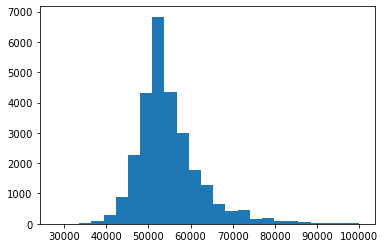

In [22]:
plt.hist(salary_df.INFLATION_SCALED_BASE_SALARY.values, bins=25)

In [23]:
overall_median_salary = np.median(salary_df.INFLATION_SCALED_BASE_SALARY)
overall_median_salary

52999.785469107555

In [24]:
salary_df[salary_df.INFLATION_SCALED_BASE_SALARY.isnull()]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY,institution


### Get university median salary

In [33]:
median_salary = []
n_salaries = []
for idx, row in university_df.iterrows():
    salary_values = salary_df[salary_df.institution == row.institution].INFLATION_SCALED_BASE_SALARY.values
    med_sal = np.median(salary_values)
    if np.isnan(med_sal):
        median_salary.append(np.nan)
        n_salaries.append(0)
        print("No postdoc data: {}".format( row.institution))
        continue
    median_salary.append(med_sal)
    n_salaries.append(len(salary_values))
median_salary = np.array(median_salary)

No postdoc data: University of Wisconsin–Madison
No postdoc data: Ohio State University, Columbus
No postdoc data: Rutgers University-New Brunswick
No postdoc data: Michigan State University
No postdoc data: University of Texas at Dallas
No postdoc data: City College of New York
No postdoc data: University of Dayton
No postdoc data: University of Hawaii at Manoa
No postdoc data: University of Nebraska Omaha
No postdoc data: University of Wisconsin–Milwaukee
No postdoc data: SUNY Downstate Medical Center
No postdoc data: University of Arkansas - Fayetteville
No postdoc data: Southern Illinois University Carbondale
No postdoc data: University of Alaska Fairbanks
No postdoc data: Louisiana Tech University
No postdoc data: Binghamton University
No postdoc data: Portland State University
No postdoc data: San Francisco State University
No postdoc data: University of Missouri–St. Louis
No postdoc data: Bowling Green State University
No postdoc data: Florida Institute of Technology
No postdoc 

In [26]:
overall_median_salary = np.nanmedian(median_salary)
overall_median_salary

52137.829135911146

In [27]:
university_df["MEDIAN_SALARY"] = median_salary

In [31]:
university_df["REAL_MEDIAN_SALARY"] = median_salary / (university_df["RPP_all"].values / 100)

In [29]:
university_df["UNIVERSITY_SALARY_RELATIVE_MEDIAN"] = 100 + 100*(median_salary - overall_median_salary)/overall_median_salary

In [32]:
university_df.to_pickle(DATA_DIR/ 'university_ranking_salary.pickle')

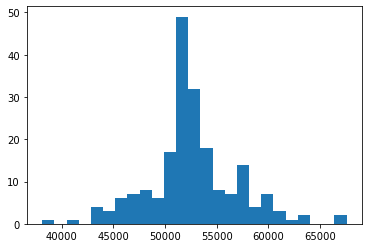

In [30]:
plt.hist(university_df["MEDIAN_SALARY"], bins=25);

In [31]:
university_df[:10]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,CSA,CITY,STATE,LONGITUDE,LATITUDE,INSTNM,IALIAS,CBSA,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,UNIVERSITY_SALARY_RELATIVE_MEDIAN
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015,148,Cambridge,MA,-71.118313,42.374471,Harvard University,,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,106.993219
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015,488,Stanford,CA,-122.167359,37.429434,Stanford University,,"San Jose-San Francisco-Oakland, CA",NaN,NaN,NaN,NaN,62476.603840,119.829699
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015,148,Cambridge,MA,-71.093226,42.359243,Massachusetts Institute of Technology,"MIT, M.I.T.","Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,108.673141
1205,6,Columbia University,USA,4,13,6,9,13,13,11,12.0,4,96.14,2015,408,New York,NY,-73.961885,40.808286,Columbia University in the City of New York,Columbia University,"New York-Newark-Jersey City, NY-NJ-PA",125.7,109.9,151.8,123.5,54049.908669,103.667355
1206,7,"University of California, Berkeley",USA,5,5,21,6,10,4,4,7.0,29,92.25,2015,488,Berkeley,CA,-122.260463,37.871918,University of California-Berkeley,UC Berkeley,"San Francisco-Oakland-Berkeley, CA",134.5,114.7,200.3,118.5,60413.982812,115.873606
1207,8,University of Chicago,USA,6,11,14,8,17,16,12,22.0,141,90.70,2015,176,Chicago,IL,-87.599539,41.787994,University of Chicago,,"Chicago-Naperville-Elgin, IL-IN-WI",102.8,100.2,112.4,100.1,57765.712798,110.794242
1208,9,Princeton University,USA,7,4,15,3,72,25,24,33.0,225,89.42,2015,408,Princeton,NJ,-74.659365,40.348732,Princeton University,,"Trenton-Princeton, NJ",106.2,100.2,121.0,105.5,52970.705761,101.597452
1209,10,Cornell University,USA,8,12,18,14,24,15,25,22.0,11,86.79,2015,296,Ithaca,NY,-76.483084,42.447200,Cornell University,,"Ithaca, NY",105.3,98.9,134.9,97.9,53441.734645,102.500882
1210,11,Yale University,USA,9,10,26,11,18,8,35,20.0,49,86.61,2015,408,New Haven,CT,-72.926688,41.311158,Yale University,,"New Haven-Milford, CT",106.2,103.9,107.1,107.9,53631.976988,102.865765
1211,12,California Institute of Technology,USA,10,6,328,7,53,9,19,25.0,13,84.40,2015,348,Pasadena,CA,-118.125878,34.137349,California Institute of Technology,Caltech,"Los Angeles-Long Beach-Anaheim, CA",118.8,105.7,169.5,106.9,60274.265828,115.605630


In [32]:
# TODO ensure all we haven't missed any universities 
# remove universitties we don't have access to 
university_df = university_df[university_df.MEDIAN_SALARY.isnull()==False]
university_df = university_df[university_df.RPP_all.isnull()==False]

In [ ]:
university_df["salary_value"]

In [33]:
university_df["salary_value"] = (
        university_df["UNIVERSITY_SALARY_RELATIVE_MEDIAN"].values
        - university_df["RPP_all"].values
    ) /100 * overall_median_salary

(0.0, 157.0)

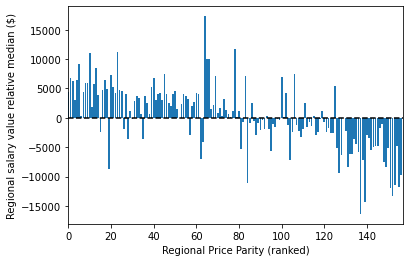

In [34]:
sort_mask = np.argsort(university_df["RPP_all"].values)
fig, ax = plt.subplots()
ax.bar(
    np.arange(len(university_df)),
    university_df["salary_value"].values[sort_mask],
)
ax.axhline(0, color="k", ls="dashed")
ax.set_xlabel('Regional Price Parity (ranked)')
ax.set_ylabel('Regional salary value relative median ($)')
ax.set_xlim([0, len(university_df)])

In [65]:
university_df[['institution', 'national_rank',  "CBSA", "RPP_all", 'MEDIAN_SALARY', "UNIVERSITY_SALARY_RELATIVE_MEDIAN","salary_value"]][:20]

,institution,national_rank,CBSA,RPP_all,MEDIAN_SALARY,UNIVERSITY_SALARY_RELATIVE_MEDIAN,salary_value
1200,Harvard University,1,"Boston-Cambridge-Newton, MA-NH",115.5,55783.941620,106.419423,-4759.943095
1202,Massachusetts Institute of Technology,3,"Boston-Cambridge-Newton, MA-NH",115.5,56659.816586,108.090336,-3884.068128
1205,Columbia University,4,"New York-Newark-Jersey City, NY-NJ-PA",125.7,54049.908669,103.111396,-11840.708721
1206,"University of California, Berkeley",5,"San Francisco-Oakland-Berkeley, CA",134.5,60413.982812,115.252185,-10089.501986
1207,University of Chicago,6,"Chicago-Naperville-Elgin, IL-IN-WI",102.8,57765.712798,110.200062,3879.034454
1208,Princeton University,7,"Trenton-Princeton, NJ",106.2,52970.705761,101.052593,-2698.216808
1209,Cornell University,8,"Ithaca, NY",105.3,53441.734645,101.951178,-1755.417394
1210,Yale University,9,"New Haven-Milford, CT",106.2,53631.976988,102.314104,-2036.945581
1211,California Institute of Technology,10,"Los Angeles-Long Beach-Anaheim, CA",118.8,60274.265828,114.985646,-1999.444165
1213,University of Pennsylvania,11,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",105.3,55237.532924,105.377035,40.380885


In [66]:
mean_top_10_salary_relative_to_average = np.mean(university_df[:10].salary_value)
mean_top_10_salary_relative_to_average

-3514.483053835355

In [67]:
mean_top_10_salary_relative_to_average/overall_median_salary

-0.06704604348249056

In [68]:
mean_top_20_salary_relative_to_average = np.mean(university_df[:20].salary_value)
mean_top_20_salary_relative_to_average, mean_top_20_salary_relative_to_average/overall_median_salary

(-3381.876762333473, -0.06451630381668551)

(0.0, 157.0)

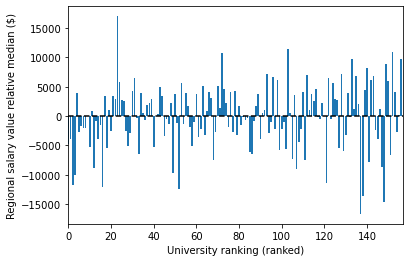

In [93]:
sort_mask = np.argsort(university_df["national_rank"].values)
fig, ax = plt.subplots()
ax.bar(
    np.arange(len(university_df)),
    university_df["salary_value"].values[sort_mask],
)
ax.axhline(0, color="k", ls="dashed")
ax.set_xlabel('University ranking (ranked)')
ax.set_ylabel('Regional salary value relative median ($)')
ax.set_xlim([0, len(university_df)])
#ax.set_xscale('log')

[]

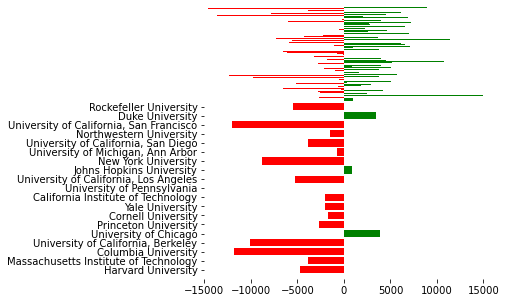

In [156]:
nex = 20
top_n = 150
sort_mask = np.argsort(university_df["national_rank"].values)
fig, axs = plt.subplots(nrows=2, figsize=(5,5), gridspec_kw = {'wspace':0, 'hspace':0, 'height_ratios': [1, 2]})
ax = axs[1]
y = university_df["salary_value"].values[sort_mask][:nex]
ax.barh(
    np.arange(len(university_df))[:nex]+1,
    y,
    color = ['green' if np.sign(i)> 0 else 'red' for i in y]
)
[i.set_linewidth(0.) for i in ax.spines.values()]
#ax.axvline(0, color="k", ls="dashed")
#ax.set_xlabel('University ranking (ranked)')
#ax.set_ylabel('Regional salary value relative median ($)')
#ax.set_yscale('log')
ax.set_xlim([-15000, 15000])
ax.set_ylim([0, nex])
#ax.set_xticks([])
ax.set_yticks(np.arange(1, 20))
ax.set_yticklabels(university_df["institution"].values[sort_mask][:20])

ax = axs[0]
y= university_df["salary_value"].values[sort_mask][nex:top_n]
ax.barh(
    np.arange(len(university_df))[nex:top_n],
    y,
    color = ['green' if np.sign(i)> 0 else 'red' for i in y]
)
ax.set_xlim([-15000, 15000])
ax.set_ylim([nex, top_n])
#ax.set_xticks([])
[i.set_linewidth(0.) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

[]

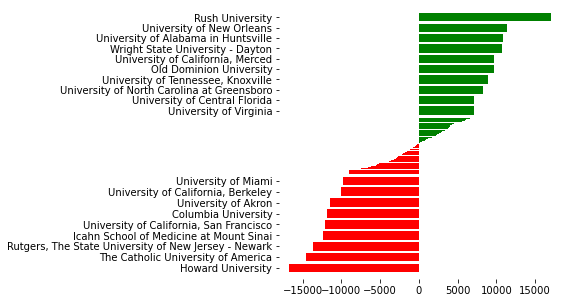

In [185]:
nex = 10
sort_mask = np.argsort(university_df["salary_value"].values)
fig, axs = plt.subplots(
    nrows=3,
    figsize=(5, 5),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [2, 1, 2]},
)

ax = axs[2]
y = university_df["salary_value"].values[sort_mask][:nex]
ax.barh(
    np.arange(len(university_df))[:nex] + 1,
    y,
    color=["green" if np.sign(i) > 0 else "red" for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_xlim([-18000, 18000])
ax.set_ylim([0, nex])
# ax.set_xticks([])
ax.set_yticks(np.arange(1, nex))
ax.set_yticklabels(university_df["institution"].values[sort_mask][:20])

ax = axs[0]
y = university_df["salary_value"].values[sort_mask][-nex:]
ax.barh(
    np.arange(len(university_df) - nex, len(university_df)),
    y,
    color=["green" if np.sign(i) > 0 else "red" for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_xlim([-18000, 18000])
ax.set_ylim([len(university_df) - nex -0.5, len(university_df) ])
# ax.set_xticks([])
ax.set_yticks(np.arange(len(university_df)-nex, len(university_df)))
ax.set_yticklabels(university_df["institution"].values[sort_mask][-nex:][::-1])
ax.set_xticks([])
    
ax = axs[1]
y = university_df["salary_value"].values[sort_mask][nex:-nex]
ax.barh(
    np.arange(len(university_df))[nex:-nex],
    y,
    color=["green" if np.sign(i) > 0 else "red" for i in y],
)
ax.set_xlim([-18000, 18000])
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

In [179]:
university_df["institution"].values[sort_mask][-nex:]

array(['Rush University', 'University of New Orleans',
       'University of Alabama in Huntsville',
       'Wright State University - Dayton',
       'University of California, Merced', 'Old Dominion University',
       'University of Tennessee, Knoxville',
       'University of North Carolina at Greensboro',
       'University of Central Florida', 'University of Virginia'],
      dtype=object)

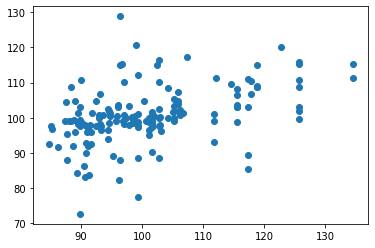

In [70]:
plt.scatter(
    university_df["RPP_all"].values,
    university_df["UNIVERSITY_SALARY_RELATIVE_MEDIAN"].values,
)

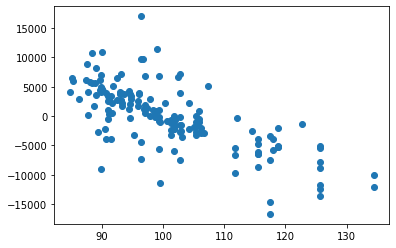

In [157]:
plt.scatter(
    university_df["RPP_all"].values,
    university_df["salary_value"].values,
)

In [74]:
salary_df = salary_df.merge(university_df[['institution', 'national_rank']])

In [75]:
salary_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY,institution,national_rank
0,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.50000,71683.249058,University of Pennsylvania,11
1,POSTDOCTORAL FELLOW,STATISTICIANS,Y,2019-07-16 15:35:18,2019-09-01 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,58989.0,NaN,Year,58989.0,Year,Level I,PLACE OF EMPLOYMENT,2019-07-16 15:35:18,2020Q4,58989.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,58989.00000,61302.045981,University of Pennsylvania,11
2,POSTDOCTORAL RESEARCHER,STATISTICIANS,Y,2017-06-26 00:00:00,2017-07-12 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,NaN,PHILADELPHIA,PA,19104,NaN,PHILADELPHIA,PHILADELPHIA,PA,19104,52140.0,NaN,Year,NaN,NaN,NaN,NaN,2017-06-26 00:00:00,2020Q4,52140.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,54045.12323,56164.312487,University of Pennsylvania,11


In [84]:
import seaborn as sns

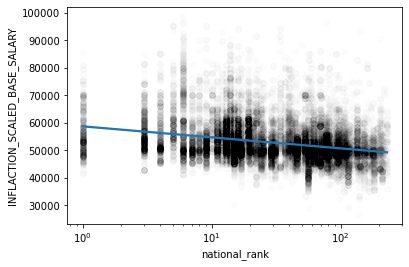

In [154]:
fig, ax = plt.subplots()
sns.regplot(
    x = 'national_rank', y= 'INFLACTION_SCALED_BASE_SALARY', data = salary_df, scatter_kws={"color": 'k', "alpha": 0.01,}, logx=True, ax=ax
)
ax.set_xscale('log')

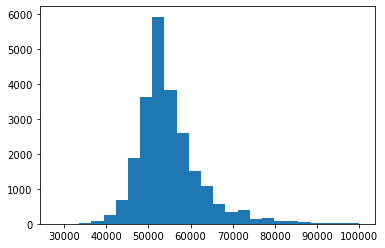

In [188]:
plt.hist(salary_df.INFLATION_SCALED_BASE_SALARY.values, bins=25);

In [192]:
salary_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY,institution,national_rank
0,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.50000,71683.249058,University of Pennsylvania,11
1,POSTDOCTORAL FELLOW,STATISTICIANS,Y,2019-07-16 15:35:18,2019-09-01 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,58989.0,NaN,Year,58989.0,Year,Level I,PLACE OF EMPLOYMENT,2019-07-16 15:35:18,2020Q4,58989.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,58989.00000,61302.045981,University of Pennsylvania,11
2,POSTDOCTORAL RESEARCHER,STATISTICIANS,Y,2017-06-26 00:00:00,2017-07-12 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,NaN,PHILADELPHIA,PA,19104,NaN,PHILADELPHIA,PHILADELPHIA,PA,19104,52140.0,NaN,Year,NaN,NaN,NaN,NaN,2017-06-26 00:00:00,2020Q4,52140.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,54045.12323,56164.312487,University of Pennsylvania,11


In [204]:
len(salary_df)

23450

(30000.0, 90000.0)

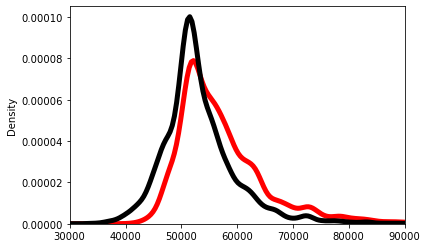

In [225]:
fig, ax = plt.subplots()
ax = sns.kdeplot(
    salary_df[salary_df.national_rank < 21].INFLATION_SCALED_BASE_SALARY.values,
    ax=ax,
    #cumulative=True,
    #kind="ecdf",
    lw=5,
    color='red',
)
ax = sns.kdeplot(
    salary_df[salary_df.national_rank >= 21].INFLATION_SCALED_BASE_SALARY.values,
    lw=5,
    #cumulative=True,
    #kind="ecdf",
    ax=ax,
    color = 'k'
    
)
ax.set_xlim([30000, 90000])